# Practice notebook for confidence intervals using NHANES data

This notebook will give you the opportunity to practice working with confidence intervals using the NHANES data.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Restrict the sample to women between 35 and 50, then use the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to partition this sample into two groups - women who are currently married, and women who are not currently married.  Within each of these groups, calculate the proportion of women who have completed college.  Calculate 95% confidence intervals for each of these proportions.

In [2]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [3]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [4]:
da['DMDMARTL'].head()

0    1.0
1    3.0
2    1.0
3    6.0
4    3.0
Name: DMDMARTL, dtype: float64

In [5]:
da['DMDMARTL'].unique()

array([ 1.,  3.,  6.,  4.,  5., nan,  2., 77.])

In [6]:
dx = da[(da['RIDAGEYR']>=35) & (da['RIDAGEYR']<=50) & (da['RIAGENDR']==2)]

In [7]:
dx.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
34,83799,NaN,NaN,NaN,2,2,37,2,1.0,4.0,...,110.0,72.0,66.6,161.6,25.5,NaN,NaN,NaN,NaN,2.0
50,83828,1.0,NaN,2.0,2,2,39,1,2.0,3.0,...,100.0,62.0,71.3,162.0,27.2,36.8,34.6,29.1,94.6,NaN
52,83832,2.0,1.0,4.0,2,2,50,1,2.0,1.0,...,NaN,NaN,105.9,157.7,42.6,29.2,35.0,40.7,129.1,NaN
55,83837,2.0,2.0,NaN,2,2,45,1,1.0,2.0,...,114.0,68.0,77.5,148.3,35.2,30.5,34.0,34.4,107.6,2.0


In [8]:
dx_married = dx[dx['DMDMARTL']==1]
dx_married.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
34,83799,NaN,NaN,NaN,2,2,37,2,1.0,4.0,...,110.0,72.0,66.6,161.6,25.5,NaN,NaN,NaN,NaN,2.0
50,83828,1.0,NaN,2.0,2,2,39,1,2.0,3.0,...,100.0,62.0,71.3,162.0,27.2,36.8,34.6,29.1,94.6,NaN
55,83837,2.0,2.0,NaN,2,2,45,1,1.0,2.0,...,114.0,68.0,77.5,148.3,35.2,30.5,34.0,34.4,107.6,2.0
61,83851,2.0,1.0,1.0,1,2,37,3,1.0,3.0,...,122.0,74.0,85.1,155.3,35.3,32.5,33.6,36.1,106.5,1.0
62,83853,NaN,NaN,NaN,2,2,49,3,1.0,3.0,...,116.0,84.0,76.1,166.7,27.4,39.2,38.6,32.6,88.7,2.0


In [9]:
dx_unmarried = dx[(dx['DMDMARTL']==2) | (dx['DMDMARTL']==3)| (dx['DMDMARTL']==4) | (dx['DMDMARTL']==5)| (dx['DMDMARTL']==6)]
dx_unmarried.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
52,83832,2.0,1.0,4.0,2,2,50,1,2.0,1.0,...,NaN,NaN,105.9,157.7,42.6,29.2,35.0,40.7,129.1,NaN
58,83845,1.0,NaN,NaN,1,2,44,4,1.0,1.0,...,116.0,78.0,133.3,171.5,45.3,37.3,35.7,48.7,NaN,2.0
100,83911,1.0,NaN,1.0,2,2,43,4,1.0,4.0,...,126.0,76.0,91.1,172.3,30.7,40.4,38.2,34.6,101.6,NaN
127,83958,2.0,1.0,2.0,1,2,47,4,1.0,3.0,...,148.0,76.0,58.6,160.6,22.7,36.8,35.2,28.0,77.9,NaN


In [10]:
dx_married_college = dx_married[dx_married['DMDEDUC2']==5]
dx_married_college.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
63,83854,2.0,1.0,1.0,2,2,46,1,1.0,5.0,...,116.0,68.0,110.2,162.7,41.6,39.2,35.6,43.4,110.2,2.0
76,83875,2.0,2.0,NaN,2,2,42,4,2.0,5.0,...,102.0,74.0,91.6,163.1,34.4,41.3,39.5,35.8,99.4,2.0
114,83935,NaN,NaN,NaN,2,2,44,5,1.0,5.0,...,102.0,72.0,55.7,154.4,23.4,35.3,33.5,26.0,86.6,2.0
124,83953,1.0,NaN,5.0,2,2,46,1,1.0,5.0,...,118.0,66.0,67.9,153.8,28.7,36.0,34.5,32.5,93.0,2.0
166,84016,1.0,NaN,2.0,2,2,41,1,2.0,5.0,...,100.0,62.0,68.9,169.0,24.1,39.0,36.0,26.9,88.4,1.0


In [11]:
dx_unmarried_college = dx_unmarried[dx_unmarried['DMDEDUC2']==5]
dx_unmarried.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
52,83832,2.0,1.0,4.0,2,2,50,1,2.0,1.0,...,NaN,NaN,105.9,157.7,42.6,29.2,35.0,40.7,129.1,NaN
58,83845,1.0,NaN,NaN,1,2,44,4,1.0,1.0,...,116.0,78.0,133.3,171.5,45.3,37.3,35.7,48.7,NaN,2.0
100,83911,1.0,NaN,1.0,2,2,43,4,1.0,4.0,...,126.0,76.0,91.1,172.3,30.7,40.4,38.2,34.6,101.6,NaN
127,83958,2.0,1.0,2.0,1,2,47,4,1.0,3.0,...,148.0,76.0,58.6,160.6,22.7,36.8,35.2,28.0,77.9,NaN


In [12]:
p_married=len(dx_married_college)/len(dx_married)
p_married

0.36080178173719374

In [13]:
p_unmarried=len(dx_unmarried_college)/len(dx_unmarried)
p_unmarried

0.21301775147928995

In [14]:
import statsmodels.stats.proportion as sm

In [15]:
len(dx_married)

449

In [16]:
len(dx_married_college)

162

In [17]:
print('lola',len(dx_unmarried),sep='\t')

lola	338


In [18]:
len(dx_unmarried_college)

72

In [19]:
lower_conf_level_unmarried, upper_conf_level_unmarried = sm.proportion_confint (72,338, alpha=0.05, method='normal')
print(lower_conf_level_unmarried, upper_conf_level_unmarried)

0.16936816767089768 0.2566673352876822


In [20]:
lower_conf_level_married, upper_conf_level_married = sm.proportion_confint (162, 449, alpha=0.05, method='normal')
print(lower_conf_level_married, upper_conf_level_married)

0.31638193710753626 0.4052216263668512


__Q1a.__ Identify which of the two confidence intervals is wider, and explain why this is the case. 

In [21]:
lower_conf_level_unmarried-upper_conf_level_unmarried

-0.08729916761678452

In [22]:
lower_conf_level_married- upper_conf_level_married

-0.08883968925931496

__Q1b.__ Write 1-2 sentences summarizing these findings for an audience that does not know what a confidence interval is (the goal here is to report the substance of what you learned about how marital status and educational attainment are related, not to teach a person what a confidence interval is).

## Question 2

Construct 95% confidence intervals for the proportion of smokers who are female, and for the proportion of smokers who are male.  Then construct a 95% confidence interval for the difference between these proportions.

In [23]:
da_female=da[da['RIAGENDR']==2]
da_female.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
5,83737,2.0,2.0,NaN,2,2,72,1,2.0,2.0,...,122.0,58.0,64.4,150.0,28.6,34.4,33.5,31.4,92.9,NaN
7,83742,1.0,NaN,1.0,2,2,32,1,2.0,4.0,...,114.0,70.0,64.5,151.3,28.2,34.1,33.1,31.5,93.3,2.0
12,83752,1.0,NaN,2.0,1,2,30,2,1.0,4.0,...,104.0,50.0,71.2,163.6,26.6,37.3,35.7,31.0,90.7,2.0


In [24]:
da_male = da[da['RIAGENDR']==1]
da_male.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
6,83741,1.0,NaN,8.0,1,1,22,4,1.0,4.0,...,112.0,74.0,76.6,165.4,28.0,38.8,38.0,34.0,86.6,NaN
8,83743,NaN,NaN,NaN,2,1,18,5,1.0,NaN,...,NaN,NaN,72.4,166.1,26.2,NaN,NaN,NaN,NaN,2.0


In [25]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [26]:
da_female_smoker=da_female[da_female['SMQ020']==1]
da_female_smoker.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
12,83752,1.0,NaN,2.0,1,2,30,2,1.0,4.0,...,104.0,50.0,71.2,163.6,26.6,37.3,35.7,31.0,90.7,2.0
18,83762,NaN,NaN,NaN,1,2,27,4,1.0,4.0,...,144.0,84.0,107.9,168.5,38.0,40.1,39.0,41.6,114.8,1.0
22,83775,2.0,1.0,NaN,1,2,69,2,1.0,1.0,...,132.0,48.0,77.7,160.2,30.3,32.7,37.6,30.7,106.8,2.0
27,83785,2.0,1.0,1.0,1,2,60,2,1.0,5.0,...,136.0,74.0,75.6,145.2,35.9,31.0,33.1,36.0,108.0,2.0
30,83788,2.0,1.0,1.0,1,2,69,3,1.0,4.0,...,148.0,72.0,84.0,164.6,31.0,35.0,35.8,33.0,103.0,2.0


In [27]:
da_male_smoker=da_male[da_male['SMQ020']==1]
da_male_smoker.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
6,83741,1.0,NaN,8.0,1,1,22,4,1.0,4.0,...,112.0,74.0,76.6,165.4,28.0,38.8,38.0,34.0,86.6,NaN
10,83747,1.0,NaN,1.0,1,1,46,3,1.0,5.0,...,150.0,90.0,86.2,176.7,27.6,41.0,38.0,33.6,104.3,2.0


In [28]:
n_male=len(da_male)
n_male

2759

In [29]:
n_male_smoker=len(da_male_smoker)
n_male_smoker

1413

In [30]:
n_female=len(da_female)
n_female

2976

In [31]:
n_female_smoker=len(da_female_smoker)
n_female_smoker

906

In [32]:
p_male=n_male_smoker/n_male
p_male

0.5121420804639362

In [33]:
p_female=n_female_smoker/n_female
p_female

0.30443548387096775

In [34]:
lower_conf_level_male, upper_conf_level_male = sm.proportion_confint (1413,2759, alpha=0.05, method='normal')
print(lower_conf_level_male, upper_conf_level_male)

0.49349056386167417 0.5307935970661982


In [35]:
lower_conf_level_female, upper_conf_level_female = sm.proportion_confint (906,2976, alpha=0.05, method='normal')
print(lower_conf_level_female, upper_conf_level_female)

0.2879026244757051 0.3209683432662304


In [36]:
se=1.96*np.sqrt((p_male*(1-p_male)/n_male)+(p_female*(1-p_female)/n_female))
se

0.024924633235056882

In [37]:
moe=1.96*se
moe

0.04885228114071149

In [38]:
lcb=(p_male-p_female)-moe
ucb=(p_male-p_female)+moe
(lcb,ucb)

(0.15885431545225692, 0.2565588777336799)

__Q2a.__ Discuss why it may be relevant to report the proportions of smokers who are female and male, and contrast this to reporting the proportions of males and females who smoke.

__Q2b.__ How does the width of the confidence interval for the difference of the two proportions compare to the widths of the confidence intervals for each proportion separately?

## Question 3

Construct a 95% interval for height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) in centimeters.  Then convert height from centimeters to inches by dividing by 2.54, and construct a 95% confidence interval for height in inches.  Finally, convert the endpoints (the lower and upper confidence limits) of the confidence interval from inches to back to centimeters   

In [39]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [40]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [41]:
dx=da[['BMXHT']]

In [42]:
dx.describe()

,BMXHT
count,5673.000000
mean,166.142834
std,10.079264
min,129.700000
25%,158.700000
50%,166.000000
75%,173.500000
max,202.700000


In [43]:
moe=1.96*(10.08/np.sqrt(5673))
moe

0.26230720005851604

In [44]:
(ucb,lcb)=(dx['BMXHT'].mean()+moe,dx['BMXHT'].mean()-moe)
(ucb, lcb)

(166.40514167917013, 165.88052727905307)

In [45]:
dx_inches = dx/2.54
dx_inches.describe()

,BMXHT
count,5673.000000
mean,65.410565
std,3.968214
min,51.062992
25%,62.480315
50%,65.354331
75%,68.307087
max,79.803150


In [46]:
moe_inches=1.96*(3.97/np.sqrt(5673))
moe_inches

0.10330948256272902

In [47]:
(ucb_inches,lcb_inches)=(dx_inches['BMXHT'].mean()+moe_inches,dx_inches['BMXHT'].mean()-moe_inches)
(ucb_inches*2.54, lcb_inches*2.54)

(166.40524056482093, 165.88042839340224)

__Q3a.__ Describe how the confidence interval constructed in centimeters relates to the confidence interval constructed in inches.

## Question 4

Partition the sample based on 10-year age bands, i.e. the resulting groups will consist of people with ages from 18-28, 29-38, etc. Construct 95% confidence intervals for the difference between the mean BMI for males and for females within each age band.

In [83]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [91]:
da['agegrp'] = pd.cut(da['RIDAGEYR'], bins=[18, 28, 38, 48,58,68,78,88], include_lowest=True)

In [97]:
dx = da[['BMXBMI','RIAGENDR','agegrp']].dropna()
dx.shape


(5662, 3)

In [103]:
dx.head()

,BMXBMI,RIAGENDR,agegrp
0,27.8,1,"(58.0, 68.0]"
1,30.8,1,"(48.0, 58.0]"
2,28.8,1,"(68.0, 78.0]"
3,42.4,2,"(48.0, 58.0]"
4,20.3,2,"(38.0, 48.0]"


In [111]:
mean_df = dx.groupby(['agegrp','RIAGENDR']).agg({"BMXBMI":np.mean}).unstack()
mean_df

BMXBMI           
RIAGENDR                1          2
agegrp                              
(17.999, 28.0]  26.969515  27.822776
(28.0, 38.0]    29.697180  29.943443
(38.0, 48.0]    29.514646  31.003733
(48.0, 58.0]    29.385132  30.787361
(58.0, 68.0]    29.232462  31.054664
(68.0, 78.0]    28.720270  30.537818
(78.0, 88.0]    27.464368  27.850000

In [112]:
type(mean_df)

pandas.core.frame.DataFrame

In [113]:
mean_df.columns=['Male', 'Female']

In [114]:
mean_df

,Male,Female
agegrp,,
"(17.999, 28.0]",26.969515,27.822776
"(28.0, 38.0]",29.697180,29.943443
"(38.0, 48.0]",29.514646,31.003733
"(48.0, 58.0]",29.385132,30.787361
"(58.0, 68.0]",29.232462,31.054664
"(68.0, 78.0]",28.720270,30.537818
"(78.0, 88.0]",27.464368,27.850000


In [115]:
std_df = dx.groupby(['agegrp','RIAGENDR']).agg({"BMXBMI":np.std}).unstack()

In [117]:
std_df.columns=['Male', 'Female']

In [118]:
std_df

,Male,Female
agegrp,,
"(17.999, 28.0]",6.779437,7.960991
"(28.0, 38.0]",6.726690,7.959097
"(38.0, 48.0]",6.104950,8.044642
"(48.0, 58.0]",6.151534,7.647590
"(58.0, 68.0]",5.959024,7.779502
"(68.0, 78.0]",5.336652,6.780588
"(78.0, 88.0]",4.695650,5.483781


In [119]:
count_df=dx.groupby(['agegrp','RIAGENDR']).agg({"BMXBMI":np.size}).unstack()
count_df.columns=['Male', 'Female']
count_df

,Male,Female
agegrp,,
"(17.999, 28.0]",515.0,562.0
"(28.0, 38.0]",461.0,488.0
"(38.0, 48.0]",396.0,509.0
"(48.0, 58.0]",417.0,451.0
"(58.0, 68.0]",459.0,461.0
"(68.0, 78.0]",296.0,275.0
"(78.0, 88.0]",174.0,198.0


In [125]:
se =pd.DataFrame(np.sqrt(((std_df['Male']**2)/count_df['Male'])+((std_df['Female']**2)/count_df['Female'])))
se.columns=['num']
se

,num
agegrp,
"(17.999, 28.0]",0.449461
"(28.0, 38.0]",0.477454
"(38.0, 48.0]",0.470384
"(48.0, 58.0]",0.469496
"(58.0, 68.0]",0.456777
"(68.0, 78.0]",0.513228
"(78.0, 88.0]",0.527823


In [126]:
moe=1.96*se
moe

,num
agegrp,
"(17.999, 28.0]",0.880944
"(28.0, 38.0]",0.935810
"(38.0, 48.0]",0.921953
"(48.0, 58.0]",0.920212
"(58.0, 68.0]",0.895282
"(68.0, 78.0]",1.005926
"(78.0, 88.0]",1.034533


In [127]:
diff_df=pd.DataFrame(mean_df['Male']-mean_df['Female'])
diff_df.columns=['num']

In [128]:
diff_df

,num
agegrp,
"(17.999, 28.0]",-0.853261
"(28.0, 38.0]",-0.246263
"(38.0, 48.0]",-1.489086
"(48.0, 58.0]",-1.402230
"(58.0, 68.0]",-1.822202
"(68.0, 78.0]",-1.817548
"(78.0, 88.0]",-0.385632


In [129]:
lcb_df  =diff_df-moe
lcb_df

,num
agegrp,
"(17.999, 28.0]",-1.734205
"(28.0, 38.0]",-1.182073
"(38.0, 48.0]",-2.411039
"(48.0, 58.0]",-2.322442
"(58.0, 68.0]",-2.717484
"(68.0, 78.0]",-2.823474
"(78.0, 88.0]",-1.420165


In [131]:
ucb_df=diff_df+moe
ucb_df

,num
agegrp,
"(17.999, 28.0]",0.027683
"(28.0, 38.0]",0.689548
"(38.0, 48.0]",-0.567134
"(48.0, 58.0]",-0.482017
"(58.0, 68.0]",-0.926919
"(68.0, 78.0]",-0.811622
"(78.0, 88.0]",0.648901


In [133]:
df_lcb_ucb=lcb_df.merge(ucb_df, on=['agegrp'])
df_lcb_ucb.columns=['lcb', 'ucb']

In [134]:
df_lcb_ucb

,lcb,ucb
agegrp,,
"(17.999, 28.0]",-1.734205,0.027683
"(28.0, 38.0]",-1.182073,0.689548
"(38.0, 48.0]",-2.411039,-0.567134
"(48.0, 58.0]",-2.322442,-0.482017
"(58.0, 68.0]",-2.717484,-0.926919
"(68.0, 78.0]",-2.823474,-0.811622
"(78.0, 88.0]",-1.420165,0.648901


__Q4a.__ How do the widths of these confidence intervals differ?  Provide an explanation for any substantial diferences in the confidence interval widths that you see.

## Question 5

Construct a 95% confidence interval for the first and second systolic blood pressure measures, and for the difference between the first and second systolic blood pressure measurements within a subject.

In [49]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [50]:
da_bp = da[['BPXSY1', 'BPXSY2']]
da_bp.dropna(inplace=True)
da_bp.columns=['BPXSY1', 'BPXSY2']
da_bp.head()

,BPXSY1,BPXSY2
0,128.0,124.0
1,146.0,140.0
2,138.0,132.0
3,132.0,134.0
4,100.0,114.0


In [51]:
da_bp['BPXSY1'].describe()

count    5369.000000
mean      125.088471
std        18.493801
min        84.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       236.000000
Name: BPXSY1, dtype: float64

In [52]:
da_bp['BPXSY2'].describe()

count    5369.000000
mean      124.413485
std        18.191573
min        84.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       238.000000
Name: BPXSY2, dtype: float64

In [53]:
bp1=da_bp[['BPXSY1']]
bp2=da_bp[['BPXSY2']]
bp1.columns=['bp']
bp2.columns=['bp']

In [54]:
bp1.head()

,bp
0,128.0
1,146.0
2,138.0
3,132.0
4,100.0


In [55]:
bp2.head()

,bp
0,124.0
1,140.0
2,132.0
3,134.0
4,114.0


In [56]:
bp1.describe()

,bp
count,5369.000000
mean,125.088471
std,18.493801
min,84.000000
25%,112.000000
50%,122.000000
75%,134.000000
max,236.000000


In [57]:
bp2.describe()

,bp
count,5369.000000
mean,124.413485
std,18.191573
min,84.000000
25%,112.000000
50%,122.000000
75%,134.000000
max,238.000000


In [58]:
bp1_se = (18.49)/np.sqrt(5369)
moe_1=1.96*bp1_se
moe_1

0.49459108111935873

In [71]:
bp1_ucb,bp1_lcb=bp1['bp'].mean()+moe_1,bp1['bp'].mean()-moe_1

In [72]:
(bp1_ucb,bp1_lcb)

(125.58306193230207, 124.59387977006337)

In [73]:
bp2_se = (18.19)/np.sqrt(5369)
moe_2=1.96*bp2_se
moe_2

0.48656634751547523

__Q5a.__ Based on these confidence intervals, would you say that a difference of zero between the population mean values of the first and second systolic blood pressure measures is consistent with the data?

In [74]:
bp2_ucb,bp2_lcb=bp2['bp'].mean()+moe_2,bp2['bp'].mean()-moe_2

In [75]:
(bp2_ucb,bp2_lcb)

(124.90005116777996, 123.92691847274901)

for difference of two means in paired data

In [76]:
mean_diff = bp1['bp'].mean()-bp2['bp'].mean()
mean_diff

0.6749860309182338

In [77]:
se = (bp1['bp'].std()-bp2['bp'].std())/np.sqrt(5369)
se

0.00412466078545481

In [81]:
moe=1.96*se
moe

0.008084335139491429

In [82]:
(lcb, ucb)=mean_diff-moe, mean_diff+moe
(lcb, ucb)

(0.6669016957787424, 0.6830703660577253)

__Q5b.__ Discuss how the width of the confidence interval for the within-subject difference compares to the widths of the confidence intervals for the first and second measures.

## Question 6

Construct a 95% confidence interval for the mean difference between the average age of a smoker, and the average age of a non-smoker.

In [60]:
smoker=da[da['SMQ020']==1]
age_smoker=smoker[['RIDAGEYR']]
age_smoker.columns=['AGE']
age_smoker.head()

,AGE
0,62
1,53
2,78
6,22
10,46


In [61]:
nonsmoker=da[da['SMQ020']==2]
age_nonsmoker=nonsmoker[['RIDAGEYR']]
age_nonsmoker.columns=['AGE']
age_nonsmoker.head()

,AGE
3,56
4,42
5,72
7,32
8,18


In [62]:
age_smoker.describe()

,AGE
count,2319.000000
mean,52.096593
std,17.461141
min,18.000000
25%,37.000000
50%,54.000000
75%,66.000000
max,80.000000


In [63]:
age_nonsmoker.describe()

,AGE
count,3406.000000
mean,45.259836
std,18.543286
min,18.000000
25%,29.000000
50%,44.000000
75%,60.000000
max,80.000000


In [64]:
se=np.sqrt((18.54*18.54/3406)+(17.46*17.46/2319))
se

0.482055651389586

In [65]:
moe=1.96*se
moe

0.9448290767235885

In [66]:
(ucb, lcb)=(52.09-45.26)+moe, (52.09-45.26-moe)

In [67]:
(lcb, ucb)

(5.885170923276417, 7.774829076723594)

__Q6a.__ Use graphical and numerical techniques to compare the variation in the ages of smokers to the variation in the ages of non-smokers.  

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

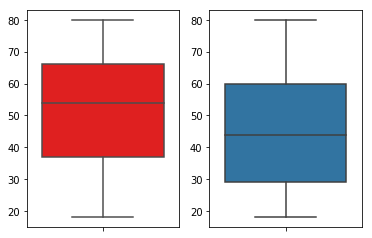

In [69]:
# boxplot for age of smoker
plt.subplot(1,2,1)
sns.boxplot(y=age_smoker,color='red')
plt.subplot(1,2,2)
sns.boxplot(y=age_nonsmoker)

__Q6b.__ Does it appear that uncertainty about the mean age of smokers, or uncertainty about the mean age of non-smokers contributed more to the uncertainty for the mean difference that we are focusing on here?